Loading dataset...
Kolom yang tersedia: Index(['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)', 'Status Gizi'], dtype='object')


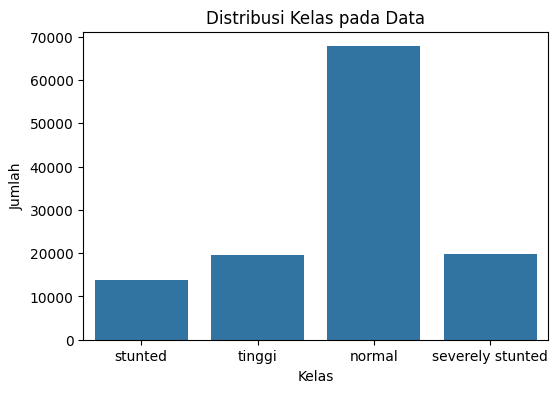

Data training dan validasi telah dibuat.
Model Random Forest telah selesai dilatih.

Hasil Evaluasi Model:
Accuracy: 1.00

Classification Report:
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13382
severely stunted       1.00      1.00      1.00      4130
         stunted       1.00      1.00      1.00      2790
          tinggi       1.00      1.00      1.00      3898

        accuracy                           1.00     24200
       macro avg       1.00      1.00      1.00     24200
    weighted avg       1.00      1.00      1.00     24200



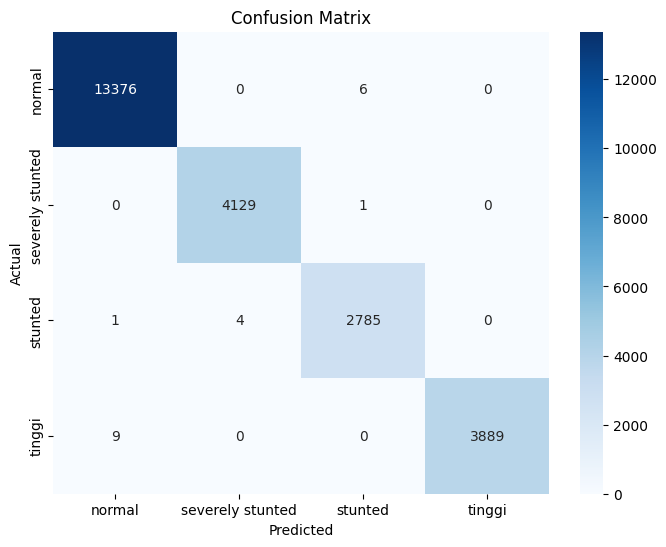

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Modul 1: Load Dataset
def load_dataset(file_path, input_columns, label_column):
    """
    Load dataset dari file CSV.
    Args:
        file_path (str): Path ke file CSV.
        input_columns (list): Kolom fitur input.
        label_column (str): Kolom target/label.
    Returns:
        X (DataFrame): Data fitur input.
        y (Series): Data target.
    """
    df = pd.read_csv(file_path)
    print("Kolom yang tersedia:", df.columns)
    
    # Hapus baris dengan nilai NaN pada kolom input dan label
    df = df.dropna(subset=input_columns + [label_column])
    
    # Encoding kolom 'Jenis Kelamin' menjadi numerik
    if 'Jenis Kelamin' in df.columns:
        le = LabelEncoder()
        df['Jenis Kelamin'] = le.fit_transform(df['Jenis Kelamin'])
    
    X = df[input_columns]
    y = df[label_column]
    return X, y

# Modul 2: Split Data
def split_data(X, y, test_size=0.2):
    """
    Membagi data menjadi data training dan testing.
    """
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)
    print("Data training dan validasi telah dibuat.")
    return X_train, X_val, y_train, y_val

# Modul 3: Training Model (Random Forest)
def train_random_forest(X_train, y_train):
    """
    Melatih model Random Forest.
    """
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    print("Model Random Forest telah selesai dilatih.")
    return model

# Modul 4: Evaluasi Model
def evaluate_model(model, X_val, y_val):
    """
    Evaluasi model menggunakan data validasi.
    """
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    print("\nHasil Evaluasi Model:")
    print(f"Accuracy: {acc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Modul 5: Plot Distribusi Data
def plot_data_distribution(y):
    """
    Menampilkan distribusi kelas pada data.
    """
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y)
    plt.title("Distribusi Kelas pada Data")
    plt.xlabel("Kelas")
    plt.ylabel("Jumlah")
    plt.show()

# Path ke dataset
file_path = "data_balita.csv"

# Kolom input dan target
input_columns = ['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)']
label_column = 'Status Gizi'  # Kelas: stunting atau tidak stunting

# 1. Load dataset
print("Loading dataset...")
X, y = load_dataset(file_path, input_columns, label_column)

# 2. Plot distribusi data
plot_data_distribution(y)

# 3. Split data menjadi training dan testing
X_train, X_val, y_train, y_val = split_data(X, y)

# 4. Training model Random Forest
model = train_random_forest(X_train, y_train)

# 5. Evaluasi model
evaluate_model(model, X_val, y_val)
